# Using Logistic Regression to Predict the Survival Status of Passengers on the Titanic

## Introduction

In this project, we use [real data from the Titanic](https://www.kaggle.com/c/titanic/data) predict whether or not a passenger survived. 

The data has been split into two groups:
* __Training set__ (train.csv) - I used this dataset to build my machine learning model. This data includes informationn on whether or not a particular passenger survived, which is what we are trying to predict.

* __Test set__ (test.csv) - I then used the test set to check how well the model performs on data it has not seen before. Unlike the training set, this set does NOT include data on whether or not a particular passenger survived. This is the outcome we are trying to product. 

For further information, please refer to the full dataset which can be found [here](https://www.kaggle.com/c/titanic/data).



### Data Dictionary
| Variable      | Definition                  | Key                       |
|-------------  |---------------------------- |--------------------       |
| PassengerID   | Passenger ID                |                           | 
| Survived      | Did the passenger survive?  | 0 = No, 1 = Yes           |
| Pclass        | Ticket class                | 1 = 1st class, 2 = 2nd class, 3 = 3rd class|
| Name          | Name of passenger           |                           |
| Sex           | Sex                         | Male, Female              |
| Age           | Age in years                |                           |
| SibSp         | No. of siblings/ spouses aboard the Titanic |           |
| Parch         | No. of parents/ children aboard the Titanic |           |
| Ticket        | Ticket number               |                           |
| Fare          | Price of ticket paid by passenger  |                    |
| Cabin         | Cabin number                |                           |
| Embarked      | Port of embarkment          | C = Cherbourg, Q = Queenstown, S = Southampton |

## 1. Importing the Data & Python Modules

In [51]:
# import python packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [52]:
test_df = pd.read_csv('test.csv') # import test data
test_df.head() # display first 5 rows of test dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can see above that the test data does not include our target variable i.e. the `Survived` column is missing. 

In [53]:
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Initial Observations - Test Data
I made the following observations: 
* There are 417 values in the test dataset.
* We can see that there are missing values in the `Age`, `Fare` and `Cabin` columns which we will address later on.
* The dataset includes Categorical Data such as `Pclass`, `Sex`, `Cabin` and `Embarked` which we will need to address before we can apply Logistic Regression.

In [54]:
train_df = pd.read_csv('train.csv') # import training data
train_df.head() # display first 5 rows of training dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Initial Observations - Training Data

* There are 890 samples in the training dataset, which we can use to train our model.
* There are some missing info under the `Age'`,`Cabin` and `Embarked` columns.
* The dataset includes some categorical data which we will need to address later on before we can perform logistic regression. 

In [56]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking for correlation between the variables
Below, we quickly check correlation rates between columns using a correlation matrix as a heatmap.

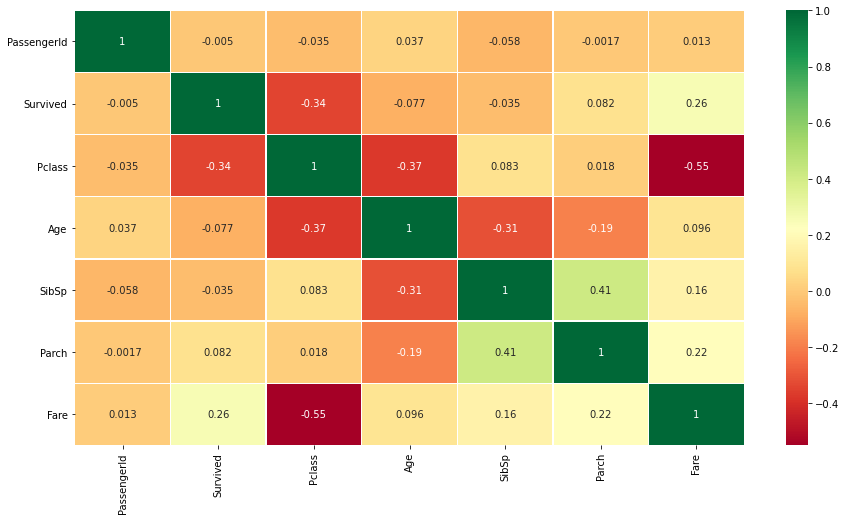

In [57]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Based on the above outcome, we can see that the correlation between the different variables is low. The highest correlation is between SibSp (number of Siblings / Spouse aboard the Titanic) and Parch (number of Parents/ children aboard the Titanic) of 0.41.

## 2. Cleaning our Dataset & Feature Engineering

First, we will prepare our dataset for training.

### 2.1 Dealing with Missing Values

There are missing values under the `Age`, `Cabin` and `Embarked` features. 

In [58]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing values in `Age`, 687 missing values in `Cabin` and 2 missing values in `Embarked`.

We will explore these columns further in this section.

### 2.2 Missing values - Age

In [59]:
age_missing = sum(pd.isnull(train_df['Age']))
age_total = len(train_df['PassengerId'])
percent_age_missing = "{:.0%}".format(age_missing / age_total)
print('There are %.0f missing values in the age feature' %age_missing)
print('This equates to approx. ' + percent_age_missing + ' of the total entries.')

There are 177 missing values in the age feature
This equates to approx. 20% of the total entries.


We know from historical accounts of the event that `Age` is an important predictor of whether or not a passenger survived. To decide the best way to impute missing values, let's look at how the `Age` feature is distributed.

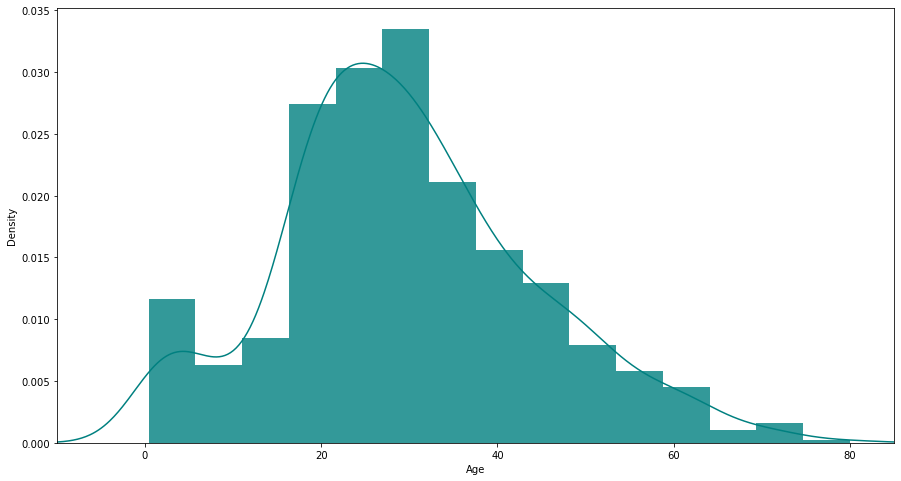

In [60]:
plt.figure(figsize=(15,8))
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.8)
train_df['Age'].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

We can see above that `Age` is right-skewed. This means that the older passengers (although there are fewer of them) will bring the average age up. We should therefore consider using the median to impute the missing values. 

In [61]:
# mean age
print('The mean age is %.2f' %(train_df['Age'].mean(skipna=True)))
# median age
print('The median age is %.2f' %(train_df['Age'].median(skipna=True)))

The mean age is 29.70
The median age is 28.00


We could use the median age of 28 to replace the missing values in our dataset. However, I wanted to see if we could make this more accurate based on other information we have. 

Previously, we saw that the `Name` variable incldues the passenger's __Title__. This should give us a good indication of which age bracket a specific passenger belongs to. 

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

In [62]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

In [63]:
train_df['Title'] = train_df['Name'].apply(get_title)

In [64]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


we will not just directly fill those NaNs with the median or mean of all existing age numbers. Instead, I wanna group all passengers data by its Title first, and then compute the median of each title group before eventually use these medians to fill the missing values. Here’s the first thing to do:


In [65]:
median_age_per_title = train_df.groupby('Title')['Age'].median()
age_median = round(median_age_per_title,0)

avg_age_pert_title = train_df.groupby('Title')['Age'].mean()
age_mean = round(avg_age_pert_title)

age_per_title = pd.concat([age_mean, age_median], axis=1)
print(age_per_title)

               Age   Age
Title                   
Capt          70.0  70.0
Col           58.0  58.0
Don           40.0  40.0
Dr            42.0  46.0
Jonkheer      38.0  38.0
Lady          48.0  48.0
Major         48.0  48.0
Master         5.0   4.0
Miss          22.0  21.0
Mlle          24.0  24.0
Mme           24.0  24.0
Mr            32.0  30.0
Mrs           36.0  35.0
Ms            28.0  28.0
Rev           43.0  46.0
Sir           49.0  49.0
the Countess  33.0  33.0


__Observations__
When we plot `Title` and `Age`, we note the following:

* Most titles band Age groups accurately. For example: Master title has Age mean and median of 5 & 4, respectively whilst;
* Mr has Age mean and median of 32 and 30, respectively. 
* We observe the same pattern for the 'Miss' and 'Mrs'

__Decision__
I will use the __median age per title__ to replace the missing values in the `Age` column.

__Note for Next Steps:__ We need to create a function to replace the missing values in the `Age` section based on the passenger's `Title`. We address this later on in this section. 

### 2.3 Missing Values - Cabin


In [66]:
cabin_missing = sum(pd.isnull(train_df['Cabin']))
cabin_total = len(train_df['PassengerId'])
percent_cabin_missing = "{:.0%}".format(cabin_missing / cabin_total)
print('There are %.0f missing values in the "Cabin" feature' %cabin_missing)
print('This equates to approx. ' + percent_cabin_missing + ' of the total entries.')

There are 687 missing values in the "Cabin" feature
This equates to approx. 77% of the total entries.


In [67]:
train_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
E101           3
              ..
D48            1
B79            1
C95            1
D28            1
D45            1
Name: Cabin, Length: 147, dtype: int64

As the majority of the values for `Cabin` are missing, __we will ignore this variable in our model__. Below, we drop the `Cabin` column from the dataframe.

### 2.4 Missing Values - Embarked

In [68]:
embarked_missing = sum(pd.isnull(train_df['Embarked']))
embarked_total = len(train_df['Embarked'])
percent_embarked_missing = "{:.2%}".format(embarked_missing / embarked_total)
print('There are %.2f missing values in the "Embarked" feature' %embarked_missing)
print('This equates to approx. ' + percent_embarked_missing + ' of the total entries.')

There are 2.00 missing values in the "Embarked" feature
This equates to approx. 0.22% of the total entries.


Let's look at the `Embarked` data more closely.

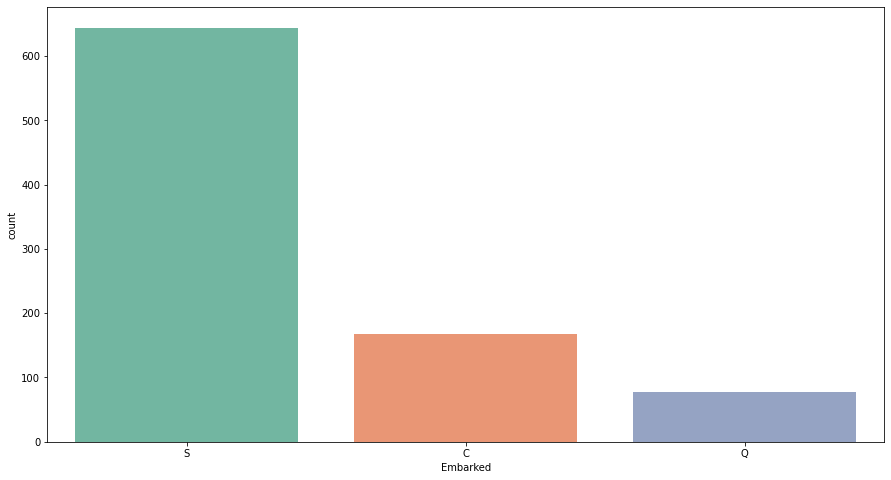

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x='Embarked', data = train_df, palette='Set2')
plt.show()

As there are only 2 missing values and the majority of the passengers boarded in Southhampton, I decided to __replace the 2 missing values with 'S' = Southampton.__

### 2.5 Making the changes
To recap, we have decided to:
* Replace the missing values in the `Age` column with the __median age based on the passenger's title__
* Remove the `Cabin` variable from our dataset
* Replace the missing values in the `Embarkment` column with `S` for Southampton

We make the above changes in the following code.

#### Replacing the Missing Values in the 'Age' Feature

We created a function, `fill_age(x)`, which accepts a single parameter which will be each row i.e. each passenger on our dataframe. This looks at the `age_median` series that we created earlier, which provides the median age for each `Title`. 

In [22]:
#create function to map median age onto given Title based on the age_median series we created earlier
def fill_age(x):
    for index, age in zip(age_median.index, age_median.values):
        if x['Title'] == index:
            return age

Then we applied the fill_age() function to our training dataset, being careful to only replace the NaN i.e. missing values which is achieved via the lambda function. If the age value is already there, then we will just use the existing value.

In the code below, we also replace the missing values in the `Embarked` column and drop the `Cabin` column. 

In [23]:
# copy train_df into new dataframe to make changes
train_df_clean = train_df.copy()

# impute median age by title into missing values in 'Age'
train_df_clean['Age'] = train_df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

# Replace missing values in 'Embarked' with 'S'
train_df_clean['Embarked'].fillna('S', inplace=True)

# remove the Cabin column from our dataset 
train_df_clean.drop('Cabin', axis=1, inplace=True)

# check that we have successfully made the above changes
train_df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [24]:
train_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see from the above output that we have successfully made the changes.

### 2.6 Checking the adjustments made in the 'Age' column

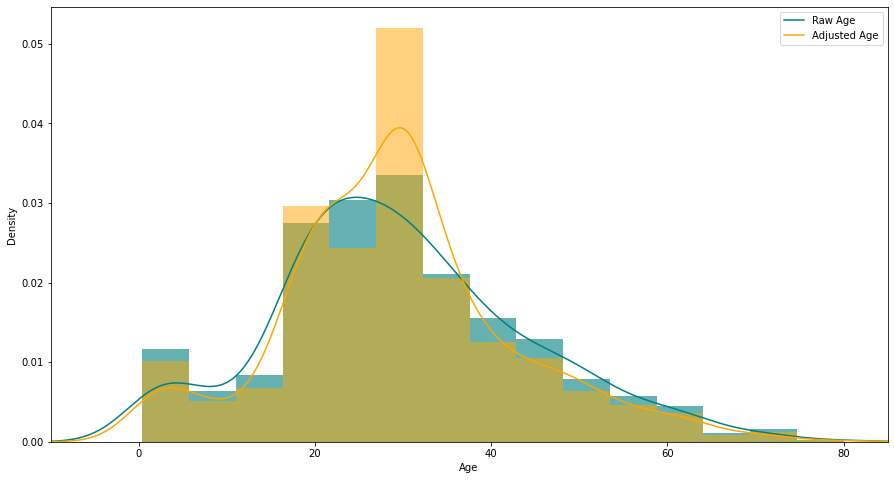

In [25]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_df_clean["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_df_clean["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


The above graph compares the distribution of the ages before the we imputed the missing values (teal) and after we replaced the missing values with the median per Title (orange). We can see that the majority of the new `Age` values added is around the median age. 

We also have some categorical variables which we need to encode for our model, which we will address in the next section.

Next, we apply further feature engineering to the remaining Categorical variables in our dataset.

### 2.7 Combining the SibSp and Parch Columns

The SibSP and Parch columns are defined as follows:
* SibSP - number of siblings or spouses traveling with the passenger
* Parch - number of parents or children traveling with the passenger

As shown earlier, there is a weak correlation between Parch and SibSp columns as expected. Children, for example, could  be traveling with both their parents and siblings. 

For simplicity, we will combine the two columns by adding up the values and storing the new value in a new column called `FamilyMembers`. 

In [26]:
# create a new column FamilyMembers as the total of SibSp & Parch
train_df_clean['FamilyMembers'] = train_df_clean['SibSp'] + train_df_clean['Parch']

# check the new column has been added correctly
train_df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [27]:
train_df_clean['FamilyMembers'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilyMembers, dtype: int64

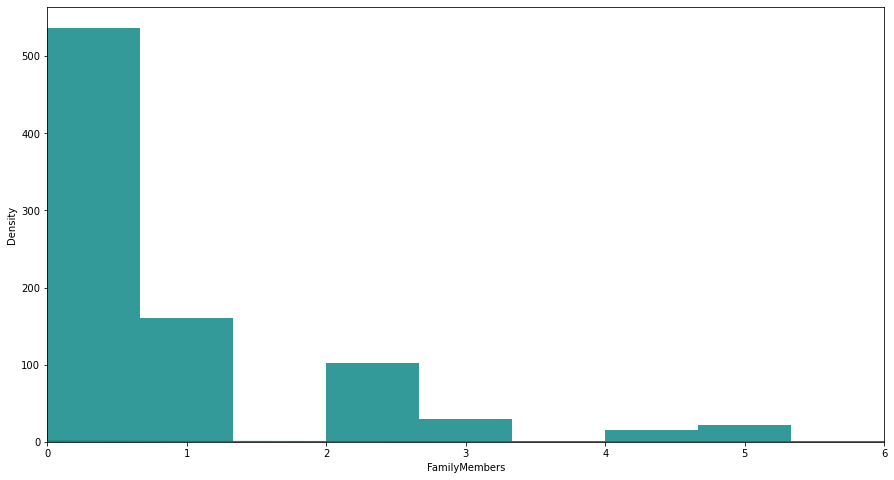

In [28]:
plt.figure(figsize=(15,8))
ax = train_df_clean['FamilyMembers'].hist(bins=15, density=False, stacked=True, color='teal', alpha=0.8)
train_df_clean['FamilyMembers'].plot(kind='density', color='teal')
ax.set(xlabel='FamilyMembers')
plt.xlim(0,6)
plt.show()

We can see from the above output that the majority of the passengers travelled alone. 

### 2.8 Dropping columns we do not need

I decided to remove some of the arbitrary values like PassengerId fom our dataset, as well as the columns we no longer need like SibSp, Parch & Title.
* PassengerID
* Name
* Ticket (ticket number)
* Parch
* SibSp 
* Title

In [29]:
# remove the values we no longer need from our dataset
train_df_clean.drop('PassengerId', axis=1, inplace=True)
train_df_clean.drop('Name', axis=1, inplace=True)
train_df_clean.drop('Ticket', axis=1, inplace=True)
train_df_clean.drop('Parch', axis=1, inplace=True)
train_df_clean.drop('SibSp', axis=1, inplace=True)
train_df_clean.drop('Title', axis=1, inplace=True)

#check that we have removed the above columns
train_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   Fare           891 non-null    float64
 5   Embarked       891 non-null    object 
 6   FamilyMembers  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


### 2.9 Dealing with Categorical Variables

I created categotical variables for the following features using the One Hot Encoding:
* `Pclass`
* `Embarked`
* `Sex` 

In [30]:
train_2 = pd.get_dummies(train_df_clean, columns = ['Pclass'])
train_3 = pd.get_dummies(train_2, columns=['Embarked'])
train_4 = pd.get_dummies(train_3, columns=['Sex'])
final_train_df = train_4

final_train_df.head()

,Survived,Age,Fare,FamilyMembers,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,7.2500,1,0,0,1,0,0,1,0,1
1,1,38.0,71.2833,1,1,0,0,1,0,0,1,0
2,1,26.0,7.9250,0,0,0,1,0,0,1,1,0
3,1,35.0,53.1000,1,1,0,0,0,0,1,1,0
4,0,35.0,8.0500,0,0,0,1,0,0,1,0,1


Our dataset now looks like the table above. Essentially, One Hot Encoding creates a binary variable for each unique value in that column or feature.

## 2.10 Applying the changes to our Test data

Below, we apply the changes we made to our training to our test data.

We start by checking for any missing values in our test data.

In [31]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We observe the following missing values:

* 1. `Age` - 86 missing values
* 2. `Fare` - 1 missing value
* 3. `Cabin` - 327 missing values

Since we decided to drop the `Cabin` column in our training data, we can do the same for our Test data. Thus, we can ignore the missing values in the `Cabin` column altogether. This leaves us with the `Age` and `Fare` columns. 


### 2.11 Missing Values (Test Data) - Fare

First, we will look at replacing the 1 missing value in the `Fare` feature by looking at the values in our training dataset.

In [32]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [33]:
# mean fare from training data
print('The mean fare is %.2f' %(train_df['Fare'].mean(skipna=True)))
# median fare from training data
print('The median fare is %.2f' %(train_df['Fare'].median(skipna=True)))

The mean fare is 32.20
The median fare is 14.45


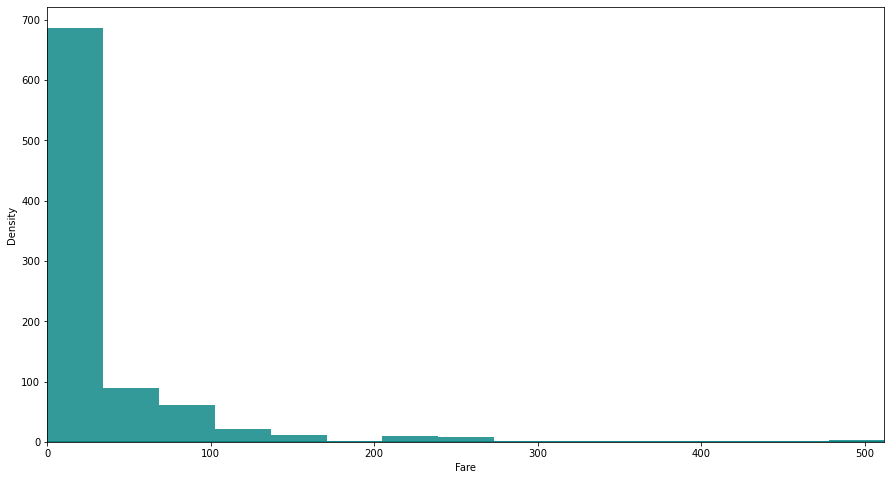

In [34]:
plt.figure(figsize=(15,8))
ax = train_df['Fare'].hist(bins=15, stacked=True, color='teal', alpha=0.8)
train_df['Fare'].plot(kind='density', color='teal')
ax.set(xlabel='Fare')
plt.xlim(0,512)
plt.show()

As we can see from the above, the majority of the passengers paid low fares under approximately £35. The few passengers that paid higher fares will bring the mean `fare` up therefore we will use the median to replace the missing value.

### 2.12 Missing Values (Test Data) - Age 

To replace the missing `Age` values in our Test data, we will use the same method as for our training data i.e. we will use the median age based on the passenger's Title to replace the missing value. 

In [35]:
def fill_age(x):
    for index, age in zip(age_median.index, age_median.values):
        if x['Title'] == index:
            return age

### 2.13 Applying the changes to our Test Data

In [36]:
# impute median age by title into missing values in 'Age'
test_df['Age'] = train_df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

# replace the missing value in the Fare column with the median value
test_df['Fare'].fillna(train_df['Fare'].median(skipna=True), inplace=True)

# make a new column for Family Members by adding the values for SibSp and Parch
test_df['FamilyMembers'] = test_df['SibSp'] + test_df['Parch']

# remove the columns that we don't need from the dataframe
test_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('PassengerId', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('SibSp', axis=1, inplace=True)

# create categorical variables for Pclass,, Embarked and Sex using One Hot Encoding
test_2 = pd.get_dummies(test_df, columns=['Pclass'])
test_3 = pd.get_dummies(test_2, columns=['Embarked'])
test_4 = pd.get_dummies(test_3, columns=['Sex'])

final_test_df = test_4

In [37]:
# check that the final test dataframe looks okay
final_test_df.head()

,Age,Fare,FamilyMembers,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,7.8292,0,0,0,1,0,1,0,0,1
1,38.0,7.0000,1,0,0,1,0,0,1,1,0
2,26.0,9.6875,0,0,1,0,0,1,0,0,1
3,35.0,8.6625,0,0,0,1,0,0,1,0,1
4,35.0,12.2875,2,0,0,1,0,0,1,1,0


## 3. Building our Machine Learning Model
First, we will define our target variable, `Survived` i.e. whether or not the passenger survived, and our feature variables (all the remaining columns in our dataset.)

In [39]:
X_features = final_train_df.drop(['Survived'], axis=1)
y_target = final_train_df['Survived']

In [40]:
#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2,random_state = 10)

In [41]:
X_train = final_train_df.drop("Survived", axis=1)
Y_train = final_train_df["Survived"]
X_test  = final_test_df
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

### 1. Logistic Regression

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/Users/lararenae/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


80.47

Our Logistic Regression model has 80.47% accuracy.

### 2. Support Vector Machines

In [43]:
### Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

67.9

Our SVM model has 67.9% accuracy

### 3. KNeighbors Classifier

In [44]:
### KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.5

Our KNeighbors Classifier Model has 83.5% accuracy, which suggests that it produces more accurate predictions than our Logistic Regression model.

### 4. Decision Tree Classifier

In [45]:
## Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.87

Our Decision Tree Classifier has 97.87% accuracy which is alarmingly high. This suggests that there may be some overfitting occurring in our model. For future work, I would like to finetune some of the parameters in this model to see if we can make it more accurate. 

### 5. Random Forest Classifier

In [46]:
## Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.87

Finally, the Random Forest model also returns a 97.8% accuracy. Some of the parameters probably need finetuning as there is possibly some overfitting here.

## Model Evaluation

### Confusion Matrix - Logistic Regression

Below, we create a Confusion Matrix based on the training data predictions produced by our Logistic Regression model.

In [47]:
# store predictions in training data
train_preds = logreg.predict(X_train)

# create a confusion matrix y_train are the actual values and train_preds are the predicted values
cm = confusion_matrix(Y_train, train_preds)

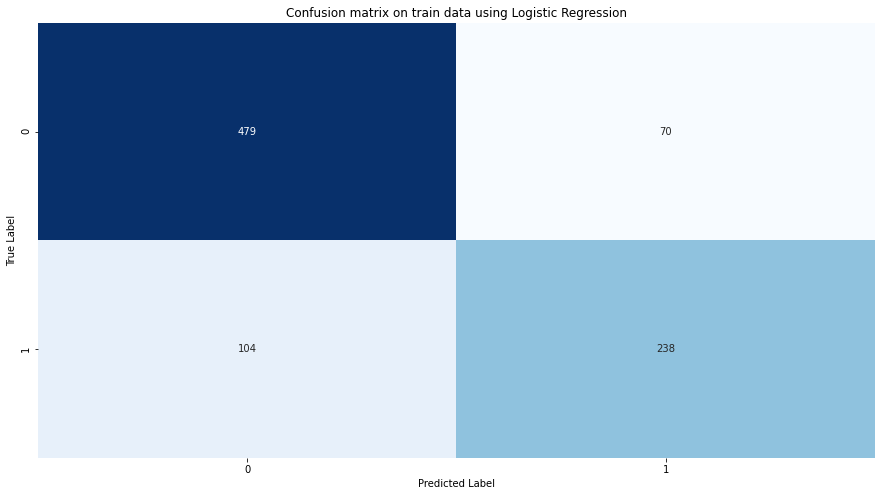

In [48]:
plt.figure(figsize=(15,8))
plt.title('Confusion matrix on train data using Logistic Regression')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Our Logistic Regression model produced:
* 479 True Negatives i.e. 479 passengers that the model predicted as 'Not Survived' did not survive in real life 
* 235 True Positives i.e. 235 passengers that the model predicted to have survived DID survive
* 104 False Negatives i.e. 104 were predicted to have not surived although they DID survive
* 70 False Positives i.e. 70 passengers that were predicted to have survived DID NOT survive

### Confusion Matrix - Random Forest 
I then created a confusion matrix based on the training data predictions produced by the Random Forest Model.

In [49]:
# store predictions in training data
train_preds = random_forest.predict(X_train)

# create a confusion matrix y_train are the actual values and train_preds are the predicted values
cm = confusion_matrix(Y_train, train_preds)

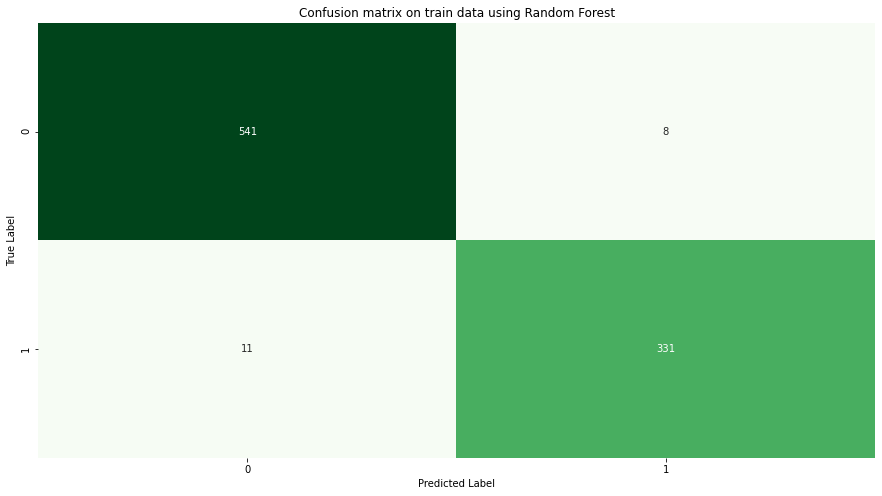

In [50]:
plt.figure(figsize=(15,8))
plt.title('Confusion matrix on train data using Random Forest')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Compared to the Logistic Regression Model, the Random Forest model seems to be more accurate, however, I suspect there may be some overfitting in the model. 

Notes for future work: Finetune the parameters for the Random Forest model to see if we can make it more accurate. 